In [1]:
# Let us generate 1,000 random numbers for:

# normal, 
# t with 3 degrees of freedom, 
# lognormal distributions, end
# your own (e.g. double exponential), 

# In all cases, we apply a chi-square test with 32 bins (K) to test for normally distributed data. 
# The normal distribution has two parameters ddof=2 (degrees of freedom = K - 2 - 1)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#n

# bins
bins = 30


In [2]:
import numpy as np
import pandas as pd

hcmv = pd.read_csv('hcmv.data.txt')
print(hcmv.head())
N = len(hcmv)
print(N)

   location
0       177
1      1321
2      1433
3      1477
4      3248
296


In [3]:
hcmv_mean = hcmv.mean()[0]
hcmv_std = hcmv.std()[0]
hcmv_mean, hcmv_std

(116960.10472972973, 64732.033537532625)

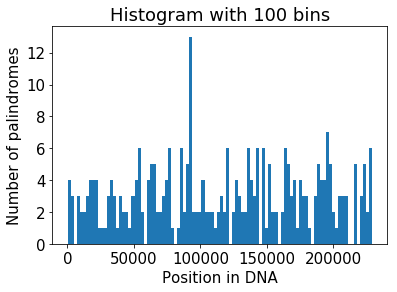

In [10]:
plt.rcParams['font.size'] = 15
bins = 100
plt.hist(hcmv.location, bins=bins)  # arguments are passed to np.histogram
plt.title("Histogram with 100 bins")
plt.xlabel("Position in DNA")
plt.ylabel("Number of palindromes")
plt.show()

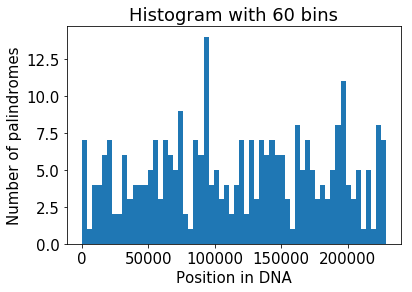

In [11]:
plt.rcParams['font.size'] = 15
bins = 60
plt.hist(hcmv.location, bins=bins)  # arguments are passed to np.histogram
plt.title("Histogram with 60 bins")
plt.xlabel("Position in DNA")
plt.ylabel("Number of palindromes")
plt.show()

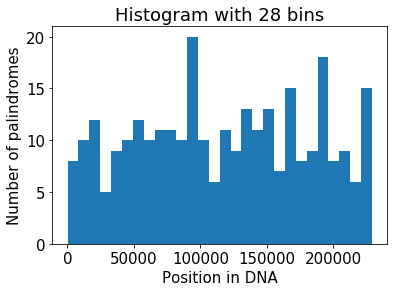

In [26]:
plt.rcParams['font.size'] = 15
bins = 28
plt.hist(hcmv.location, bins=bins)  # arguments are passed to np.histogram
plt.title("Histogram with 28 bins")
plt.xlabel("Position in DNA")
plt.ylabel("Number of palindromes")
plt.show()

In [27]:
import scipy

bins = 28
mu = hcmv_mean
sigma = hcmv_std
original = hcmv.location
h_orignal = np.histogram(original, bins = bins)
for i in range(20):
    Y_uni = np.sort(np.random.uniform(low=0, high=229354, size=N))
    h_uni = np.histogram(Y_uni, bins = bins)
    print(scipy.stats.chisquare(f_obs=h_orignal[0], f_exp=h_uni[0], ddof=0))

Power_divergenceResult(statistic=129.77257611669378, pvalue=2.1383021418055575e-15)
Power_divergenceResult(statistic=66.11346929214577, pvalue=3.948634944629157e-05)
Power_divergenceResult(statistic=36.14039571539572, pvalue=0.11226408207891406)
Power_divergenceResult(statistic=48.30810578310579, pvalue=0.00709185336312488)
Power_divergenceResult(statistic=66.35890775890776, pvalue=3.650994104603114e-05)
Power_divergenceResult(statistic=116.13335275835274, pvalue=5.020213233121008e-13)
Power_divergenceResult(statistic=59.513936635260166, pvalue=0.00030536475131640755)
Power_divergenceResult(statistic=67.01455211455212, pvalue=2.9591300988070807e-05)
Power_divergenceResult(statistic=61.65946692196692, pvalue=0.0001591974482944087)
Power_divergenceResult(statistic=74.70168083550436, pvalue=2.3360324443481006e-06)
Power_divergenceResult(statistic=88.47652208902208, pvalue=1.845760878261788e-08)
Power_divergenceResult(statistic=80.5162851037851, pvalue=3.153108927482213e-07)
Power_divergen

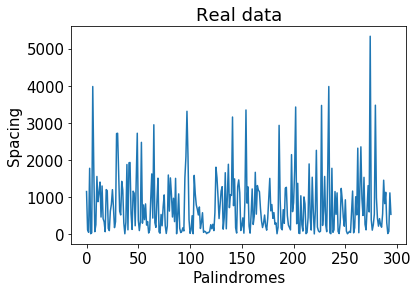

In [30]:
plt.rcParams['font.size'] = 15
dif = [original[i]-original[i-1] for i in range(1,len(original))]
plt.title("Real data")
plt.xlabel("Palindromes")
plt.ylabel("Spacing")
plt.plot(dif)

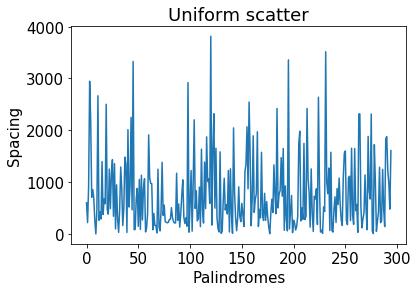

In [31]:
plt.rcParams['font.size'] = 15
dif = [Y_uni[i]-Y_uni[i-1] for i in range(1,len(Y_uni))]
plt.title("Uniform scatter")
plt.xlabel("Palindromes")
plt.ylabel("Spacing")
plt.plot(dif)

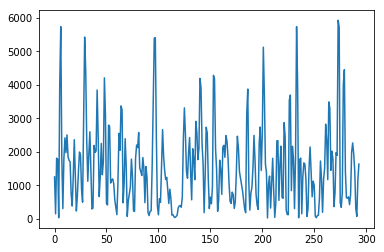

In [51]:
dif = [original[i]-original[i-2] for i in range(2,len(original))]
plt.plot(dif)

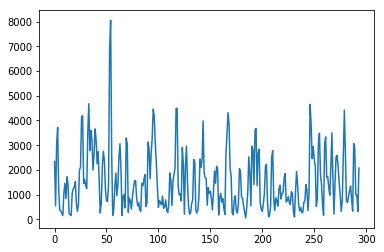

In [52]:
dif = [Y_uni[i]-Y_uni[i-2] for i in range(2,len(Y_uni))]
plt.plot(dif)

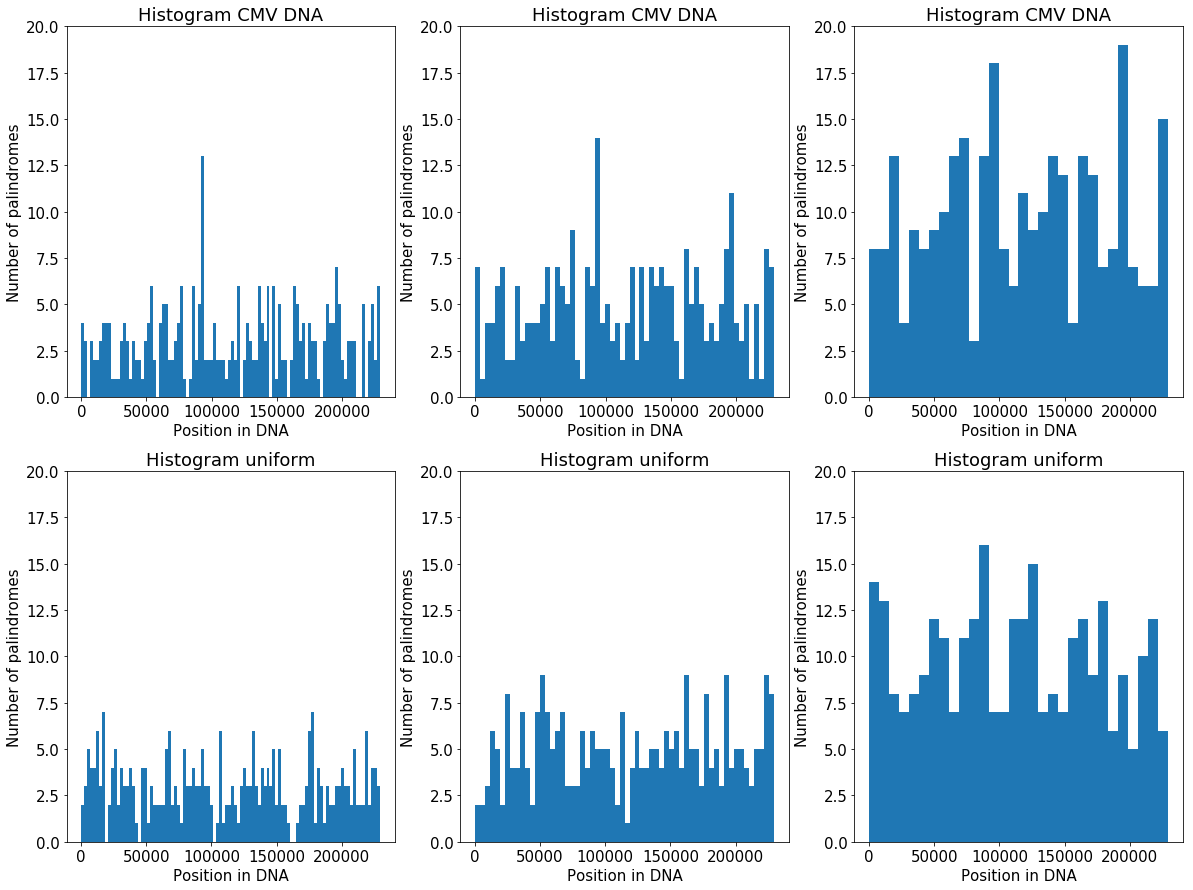

In [35]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]
bins_array = [100,60,30,100,60,30]
for i in range(1, 7):
    plt.subplot(2, 3, i)
    bins = bins_array[i-1]
    plt.ylim(0,20)
    if i <4:
        data = original
    else:
        data = np.sort(np.random.uniform(low=0, high=229354, size=N))
    plt.hist(data, bins=bins)  # arguments are passed to np.histogram
    if i <4:
        plt.title("Histogram CMV DNA")
        plt.xlabel("Position in DNA")
        plt.ylabel("Number of palindromes")
    else:
        plt.title("Histogram uniform")
        plt.xlabel("Position in DNA")
        plt.ylabel("Number of palindromes")


In [90]:
print(h_orignal[0])
indexes = np.argsort(h_orignal[0])[-5:]
for i in indexes:
    print("begin:",h_orignal[1][i],"end:",h_orignal[1][i+1])

[ 8  8 13  4  9  8  9 10 13 14  3 13 18  8  6 11  9 10 13 12  4 13 12  7
  8 19  7  6  6 15]
begin: 160320.2 end: 167946.06666666668
begin: 68809.8 end: 76435.66666666667
begin: 221327.13333333333 end: 228953.0
begin: 91687.4 end: 99313.26666666666
begin: 190823.66666666666 end: 198449.53333333333
